In [65]:
import BPTK_Py
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

bptk = BPTK_Py.bptk()
model = Model(starttime=1.0,stoptime=100.0, dt=1.0, name='carInventory')

In [94]:
inventory = model.stock("inventory")
perceived_sales = model.stock("perceived_sales")

In [95]:
deliveries = model.flow("deliveries")
new_sales = model.flow("new_sales")
old_sales = model.flow("old_sales")

In [160]:
t = model.converter('t')

customer_demand = model.converter("customer_demand")
perception_delay = model.constant('perception_delay')
n_days_inventory = model.constant('n_days_inventory')
desired_inventory = model.converter("desired_inventory")

discrepancy = model.converter("discrepancy")

response_delay = model.constant('response_delay')
order_to_factory = model.converter("order_to_factory")

delivery_delay = model.constant("delivery_delay")


In [214]:
t = sd.time()

inventory.initial_value = 1000.0
n_days_inventory.equation = 10.0

customer_demand.equation = sd.step(50.0,1.0)
deliveries.equation = sd.delay(model, order_to_factory, delivery_delay)
new_sales.equation = customer_demand

perception_delay.equation = 5.0
response_delay.equation = 3.0
delivery_delay.equation = 4.0

old_sales.equation = sd.delay(model, new_sales, perception_delay)

perceived_sales.equation = (new_sales - old_sales)/perception_delay
desired_inventory.equation = perceived_sales * n_days_inventory

inventory.equation =  deliveries - new_sales

discrepancy.equation = sd.max(0, desired_inventory - inventory)

order_to_factory.equation = discrepancy / response_delay


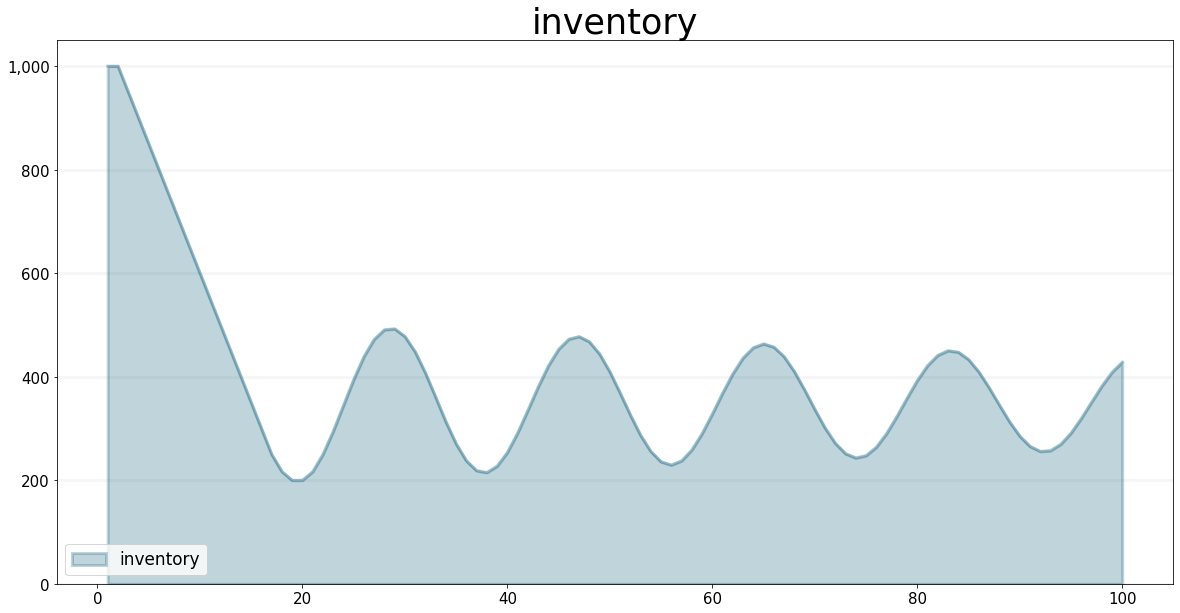

In [215]:
inventory.plot()

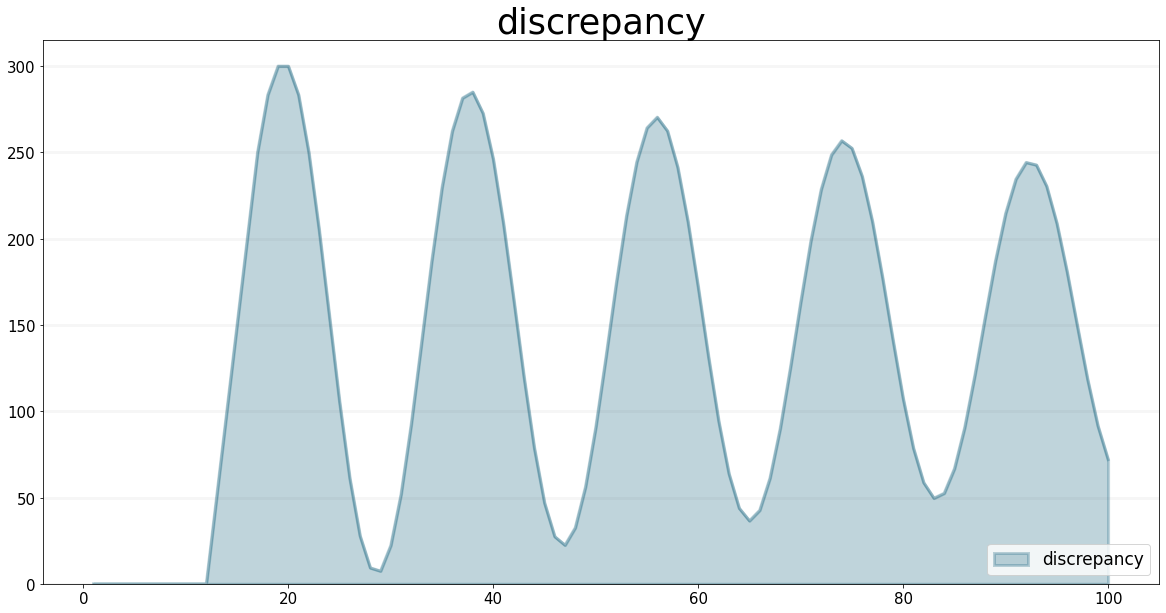

In [216]:
discrepancy.plot()

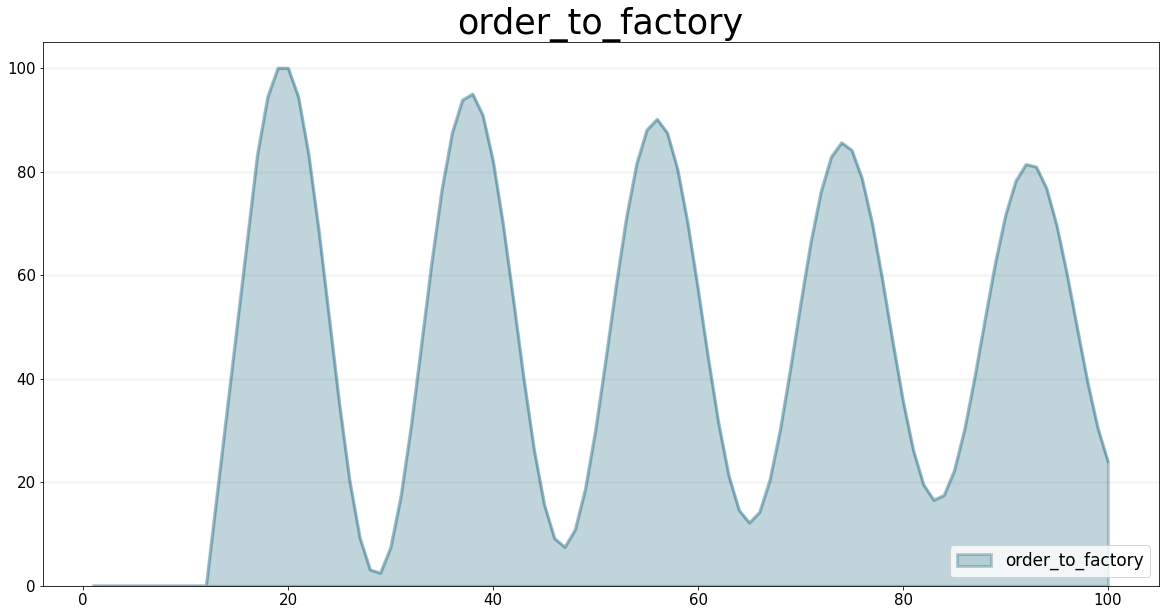

In [218]:
order_to_factory.plot()